## Data Analysis of Wine Quality Factors Using Linear Regression
- Kim Damalas, 24 Jan 2021; seattle-401pyn2
- From Kaggle [wine quality factors](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [7]:
# read in data, create DataFrame = dfw
dfw = pd.read_csv("./winequality-red.csv")

In [8]:
# show first 5 in dataset
dfw.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
# show dataset descriptive stats
print(dfw.describe())


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [10]:
# show dataset information
print(dfw.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [31]:
# split data into train and test
# How does residual sugar affect % alcohol of wine?

X = dfw['residual sugar'].values
y = dfw['alcohol'].values
X, y

(array([1.9, 2.6, 2.3, ..., 2.3, 2. , 3.6]),
 array([ 9.4,  9.8,  9.8, ..., 11. , 10.2, 11. ]))

In [32]:
# reshape the data
X = X.reshape(-1, 1)
X

array([[1.9],
       [2.6],
       [2.3],
       ...,
       [2.3],
       [2. ],
       [3.6]])

In [33]:
# train_test_split setup
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = .8, test_size = .2, random_state = 100)

In [34]:
# Print data shapes
print(f'x-train shape{[x_train.shape]}')
print(f'x-test shape{[x_test.shape]}')
print(f'y-train shape{[y_train.shape]}')
print(f'y-test shape{[y_test.shape]}')


x-train shape[(1279, 1)]
x-test shape[(320, 1)]
y-train shape[(1279,)]
y-test shape[(320,)]


Text(0.5, 1.0, 'Wine Quality Training Data')

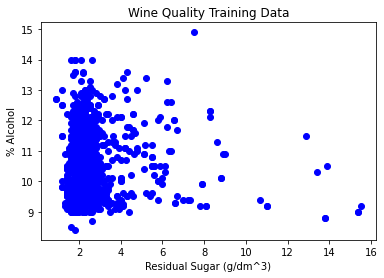

In [35]:
# plot training data
plt.scatter(x_train, y_train, color = 'blue')
plt.xlabel('Residual Sugar (g/dm^3)')
plt.ylabel('% Alcohol')
plt.title('Wine Quality Training Data')



In [36]:
lm = LinearRegression()
lm.fit(x_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs= None, normalize=False)
y_predict = lm.predict(x_test)
print(f'Train Data Accuracy{round(lm.score(x_train, y_train)*100,2)}%')
print(f'Test Data Accuracy{round(lm.score(x_test, y_test)*100,2)}%')

Train Data Accuracy0.12%
Test Data Accuracy-0.81%
